In [1]:
import os

import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt

from tqdm import tqdm
from glob import glob

from pathlib import Path

import tifffile

# Used data sources

* kaggle data

* GLAS

# Kaggle HPA

In [2]:
SCALE_FACTOR = 0.5
PATCH_SIZE = 768

In [5]:
df = pd.read_csv('./../data/train.csv')

In [21]:
# !rm ./../data/SIMMIM/kaggle_hpa/*.png

In [22]:
def make_path_to_img(id: str):
    ans = (
        './../data/train_images/{}.tiff'.format(id),
        './../data/train_masks/{}.npy'.format(id)
    )
    return ans

In [23]:
def patchify_image(id: str, output_dir_img: str, output_dir_mask: str, organ: str):
    Path(output_dir_img).mkdir(parents=True, exist_ok=True)
#     Path(output_dir_mask).mkdir(parents=True, exist_ok=True)
    
    iname, mname = make_path_to_img(id)
    
    img = cv.imread(iname)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    mask = np.load(mname)
    
    img = cv.resize(img, None, fx=SCALE_FACTOR, fy=SCALE_FACTOR, interpolation=cv.INTER_AREA)
    mask = cv.resize(mask, dsize=img.shape[:2], interpolation=cv.INTER_NEAREST)
    
    thresh = img.mean(axis=2).astype(np.uint8)
    
    color = np.array([0, 0, 0])
    img = np.stack([np.pad(img[:,:,c], PATCH_SIZE//8, mode='constant', constant_values=color[c]) for c in range(3)], axis=2)

    mask = np.pad(mask, PATCH_SIZE // 8, mode='constant', constant_values=color[0])
    
    thresh = np.pad(thresh, PATCH_SIZE // 8, mode='constant', constant_values=255)
    _, thresh = cv.threshold(thresh, int(thresh.mean()), 255, cv.THRESH_BINARY)
    
#     plt.imshow(thresh, cmap='gray')
#     plt.show()
    
#     plt.imshow(img)
#     plt.show()
    
#     plt.imshow(mask)
#     plt.show()
    
    H, W, _ = img.shape
    
    patch_index = 0
    for dy in range(0, H - PATCH_SIZE, PATCH_SIZE // 2):
        for dx in range(0, W - PATCH_SIZE, PATCH_SIZE // 2):
            th_slc = thresh[dy : dy + PATCH_SIZE, dx : dx + PATCH_SIZE]
            th_slc = 1 - th_slc / 255
            th_sum = th_slc.sum()
            if th_sum < 1000:
                continue
            
            
            patch = img[dy : dy + PATCH_SIZE, dx : dx + PATCH_SIZE]
            maskpatch = mask[dy : dy + PATCH_SIZE, dx : dx + PATCH_SIZE]
            
            cv.imwrite(os.path.join(output_dir_img, '{}_{}_{:05d}.png'.format(organ, id, patch_index)), patch[:, :, ::-1])
#             cv.imwrite(os.path.join(output_dir_mask, '{}_{:05d}.png'.format(id, patch_index)), maskpatch)
            
            patch_index += 1
            
#             print(mask.min(), mask.max())
#             0/0

In [24]:
# patchify_image(
#     '10044', 
#     './../data/SIMMIM/kaggle_hpa/', 
#     None
# )

In [25]:
for index, row in tqdm(df.iterrows()):
    if True:
#         print(row['id'])
        patchify_image(
            row['id'], 
            './../data/SIMMIM/kaggle_hpa/', 
            None,
            organ=row['organ']
        )

351it [03:47,  1.54it/s]


In [11]:
set(df['organ'])

{'kidney', 'largeintestine', 'lung', 'prostate', 'spleen'}

# GLAS

In [35]:
!mkdir ./../data/SIMMIM/glas_largeintestine

In [39]:
for fname in glob('./../data/SIMMIM_raw/glas_Warwick_QU/*.bmp'):
    if 'anno' not in fname:
#         print(fname)
        bname = os.path.basename(fname).split('.')[0]
#         print(bname)
        img = cv.imread(fname)[:, :, ::-1]
        msz = img.shape[0]
        new_sz = (768, int(img.shape[1] * ((768 + 4) / msz)))
        img = cv.resize(img, new_sz[::-1])
        for ind, dx in enumerate([0, img.shape[1] - PATCH_SIZE]):
            patch = img[:, dx: dx + 768]
            cv.imwrite('./../data/SIMMIM/glas_largeintestine/{}_{}_{}.png'.format('largeintestine', bname, ind), patch[:, :, ::-1])
#         
#         plt.imshow(img)
#         plt.show()
#         break

train_76
testA_6
testA_28
train_12
train_27
train_47
train_25
testA_37
testA_30
testB_8
train_41
testA_8
train_5
train_40
testA_56
testA_21
train_84
testA_36
train_61
train_66
train_50
train_29
train_72
testA_10
testA_48
train_82
train_48
train_73
testA_57
train_3
train_83
testA_22
train_68
train_74
train_28
testB_12
testA_41
testB_11
testA_13
testA_11
train_17
train_59
train_85
testA_24
train_24
train_64
testA_46
train_42
train_53
train_10
testA_42
testB_19
train_23
train_51
train_60
train_18
train_75
train_71
testA_2
testA_43
testA_58
testB_20
testA_20
train_52
train_34
testA_12
testB_16
testA_33
train_79
train_16
train_22
testA_7
testB_4
testA_27
testA_49
testA_59
train_8
testB_9
testA_15
train_45
train_44
testA_29
testA_55
train_63
testB_13
testA_51
train_65
testB_10
train_58
testA_45
testA_14
train_80
train_70
testA_5
train_32
train_6
testA_23
testA_47
testB_17
testB_7
train_62
testA_18
testA_54
train_38
train_1
testB_3
train_31
train_56
testB_15
train_57
train_9
testA_53
train_77

In [34]:
# img.shape

(768, 1146, 3)

In [29]:
# img = cv.imread('./../data/SIMMIM_raw/glas_Warwick_QU/train_76.bmp')[:, :, ::-1]

In [40]:
# plt.imshow(img)
# plt.show()

# largeintestine_histologyslides_177_HISTO_40X.zif

In [4]:
im = tifffile.imread('./../data_downloads/largeintestine_histologyslides_177_HISTO_40X.zif')

In [5]:
im.shape

(39862, 94733, 3)

In [6]:
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

In [7]:
im_small = cv.resize(im, (1600, 1000))

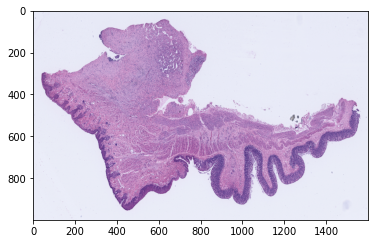

In [8]:
plt.imshow(im_small)
plt.show()

In [10]:
hsv = cv.cvtColor(im_small, cv.COLOR_RGB2HSV)

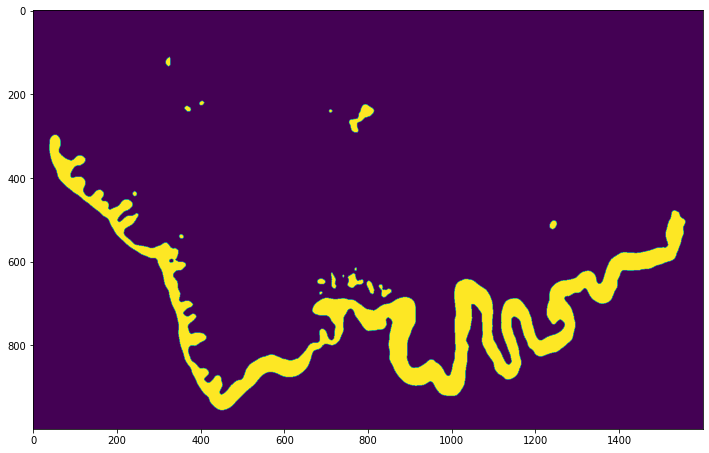

In [14]:
mask = ((hsv[:, :, 2] < 170)).astype(np.float32)
mask = (cv.blur(mask, ksize=(15, 15)) > 0.4).astype(np.uint8)

mask = cv.medianBlur(mask, 11)


plt.figure(figsize=(12, 8))
plt.imshow(mask)
plt.show()

In [15]:
mask[:, :770] = 0

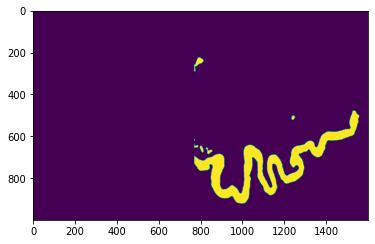

In [16]:
plt.imshow(mask)

In [17]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [18]:
!mkdir ./../data/SIMMIM/largeintestine_histologyslides_177_HISTO

In [22]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.05:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/largeintestine_histologyslides_177_HISTO/largeintestine_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 25/25 [00:07<00:00,  3.13it/s]


# largeintestine_histologyslides_176_HISTO_40X.zif

In [47]:
import tifffile

In [48]:
im = tifffile.imread('./../data_downloads/largeintestine_histologyslides_176_HISTO_40X.zif')

In [49]:
im.shape

(52528, 88992, 3)

In [50]:
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

In [69]:
im_small = cv.resize(im, (1600, 1000))

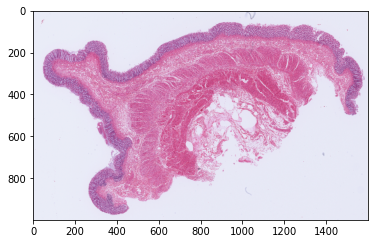

In [70]:
plt.imshow(im_small)
plt.show()

In [91]:
hsv[210, 200], hsv[400, 600]

(array([156, 103, 198], dtype=uint8), array([162, 105, 222], dtype=uint8))

In [71]:
hsv = cv.cvtColor(im_small, cv.COLOR_RGB2HSV)

In [99]:
mask[230, 200]

0.5289256

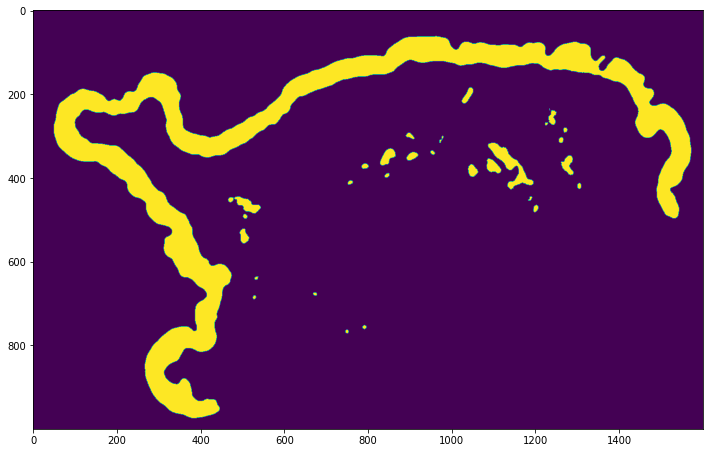

In [106]:
mask = ((hsv[:, :, 2] > 100) & (hsv[:, :, 2] < 200)).astype(np.float32)
mask = (cv.blur(mask, ksize=(15, 15)) > 0.4).astype(np.uint8)

mask = cv.medianBlur(mask, 11)


plt.figure(figsize=(12, 8))
plt.imshow(mask)
plt.show()


In [63]:
hsv2.mean(axis=(0, 1))

array([163.23617 , 136.167524, 207.20336 ])

In [107]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [109]:
!mkdir ./../data/SIMMIM/largeintestine_histologyslides_176_HISTO

In [112]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.05:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/largeintestine_histologyslides_176_HISTO/largeintestine_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 34/34 [00:20<00:00,  1.67it/s]


In [ ]:
# len(glob())

# largeintestine https://zenodo.org/record/53169

In [23]:
im = tifffile.imread('./../data/SIMMIM_raw/Kather_texture_2016_larger_images_10/CRC-Prim-HE-01_APPLICATION.tif')

In [26]:
im.shape

(5000, 5000, 3)

In [24]:
im_small = cv.resize(im, (1600, 1000))

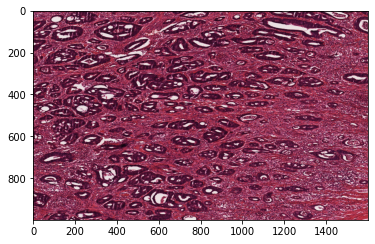

In [25]:
plt.imshow(im_small)
plt.show()

In [27]:
!mkdir ./../data/SIMMIM/largeintestine_Kather

(5000, 5000, 3)


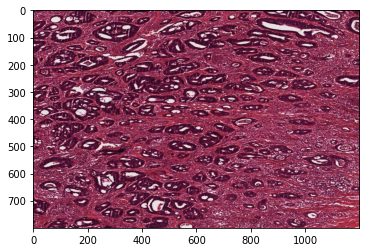

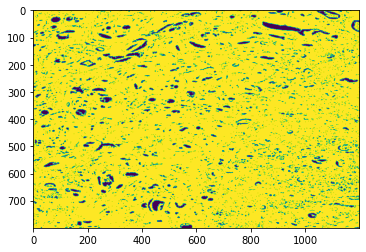

100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


(5000, 5000, 3)


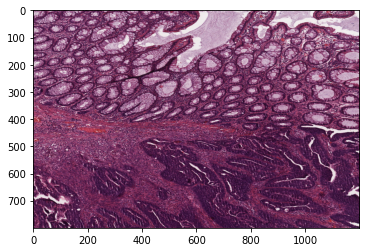

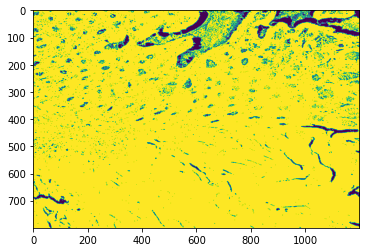

100%|██████████| 4/4 [00:00<00:00,  4.49it/s]


(5000, 5000, 3)


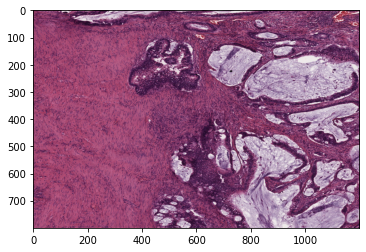

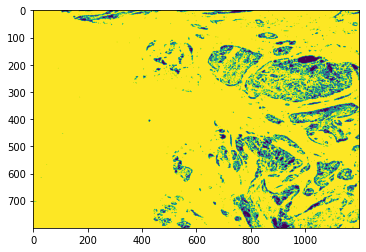

100%|██████████| 4/4 [00:00<00:00,  5.18it/s]


(5000, 5000, 3)


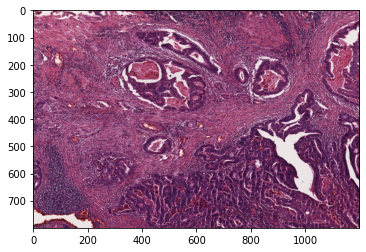

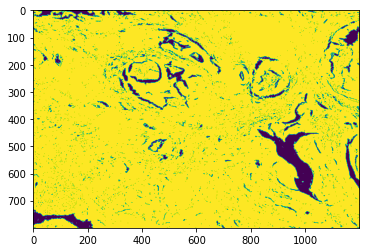

100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


(5000, 5000, 3)


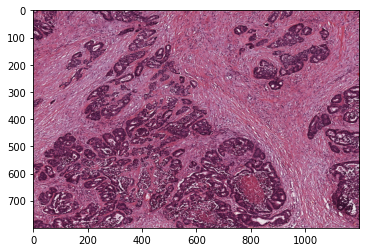

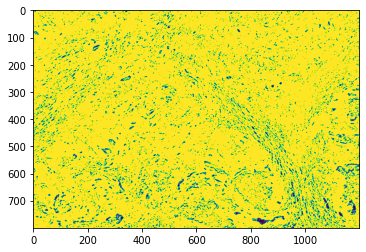

100%|██████████| 4/4 [00:00<00:00,  4.71it/s]


(5000, 5000, 3)


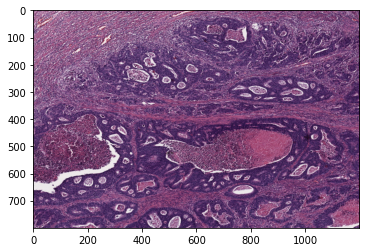

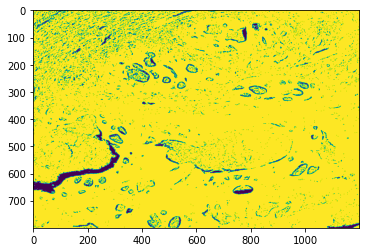

100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


(5000, 5000, 3)


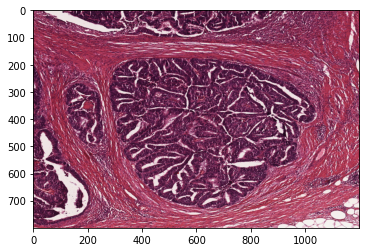

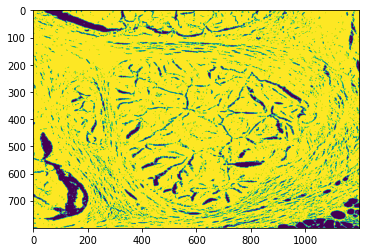

100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


(5000, 5000, 3)


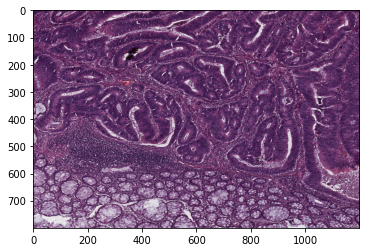

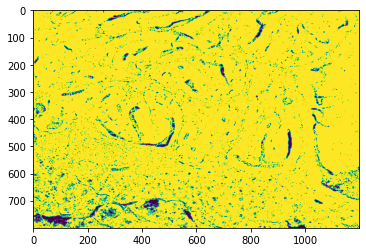

100%|██████████| 4/4 [00:00<00:00,  4.94it/s]


(5000, 5000, 3)


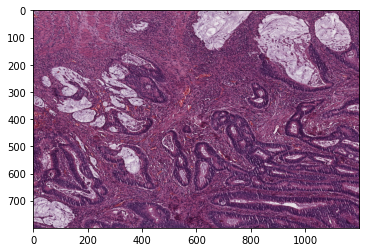

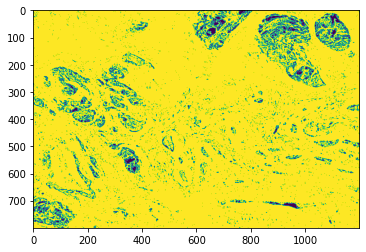

100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


(5000, 5000, 3)


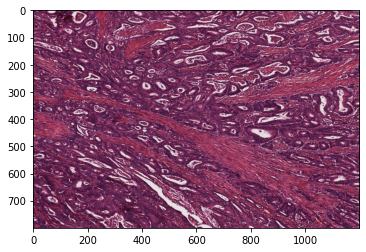

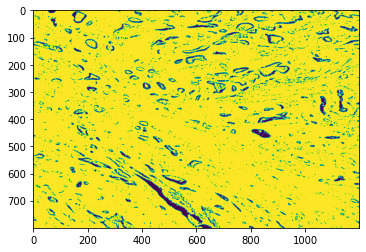

100%|██████████| 4/4 [00:00<00:00,  4.63it/s]


In [28]:
for fname in glob('./../data/SIMMIM_raw/Kather_texture_2016_larger_images_10/*.tif'):
    im = np.squeeze(tifffile.imread(fname))
    bname = os.path.basename(fname)
    print(im.shape)
    
    if (im.shape[0] == 3):
        im = im.transpose((1, 2, 0))
    
    im = cv.resize(im, None, fx=0.5 * (0.495 / 0.4), fy=0.5 * (0.495 / 0.4), interpolation=cv.INTER_AREA)
    im_small = cv.resize(im, (1200, 800))
    plt.imshow(im_small)
    plt.show()
    mask = ((im_small.mean(axis=2) > 1) & (im_small.mean(axis=2) < 200)).astype(np.uint8)
    plt.imshow(mask)
    plt.show()
    
    mask = cv.resize(mask, (im.shape[1], im.shape[0]))
    
    for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
        for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
            mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
            if mask_slc.mean() > 0.05:
                patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
    #             plt.imshow(patch)
    #             plt.show()
    #             0/0
                cv.imwrite(
                    './../data/SIMMIM/largeintestine_Kather/largeintestine_{}_patch_dy_{}_dx_{}.png'.format(bname, dy, dx),
                    patch[:, :, ::-1]
                )

# spleen

In [115]:
im = tifffile.imread('./../data_downloads/spleen_histologyslides_147B_HISTO_40X.zif')

In [116]:
im.shape

(24279, 43650, 3)

In [117]:
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

In [120]:
im_small = cv.resize(im, (1600, 800))

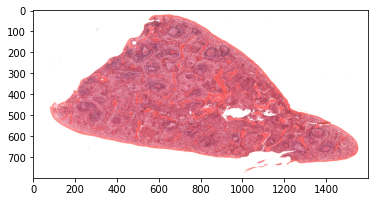

In [121]:
plt.imshow(im_small)
plt.show()

In [131]:
mask = (im_small.mean(axis=2) < 240).astype(np.uint8)

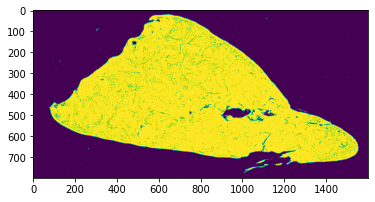

In [132]:
plt.imshow(mask)
plt.show()

In [133]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [135]:
# !mkdir ./../data/SIMMIM/spleen_histologyslides_147B_HISTO

In [136]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/spleen_histologyslides_147B_HISTO/spleen_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 15/15 [00:11<00:00,  1.32it/s]


# spleen 2

In [24]:
im = tifffile.imread('./../data_downloads/spleen_histologyslides_148_HISTO_20X.zif')

In [25]:
im.shape

(16837, 28140, 3)

In [ ]:
# NO RESIZE

In [26]:
im_small = cv.resize(im, (1600, 800))

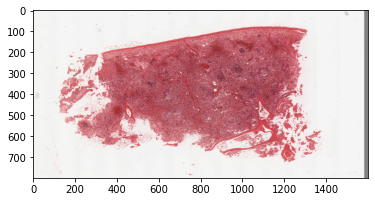

In [27]:
plt.imshow(im_small)
plt.show()

In [35]:
mask = (im_small.mean(axis=2) < 240).astype(np.uint8)
mask[:, 1300:] = 0
mask[:150] = 0
mask[600:] = 0

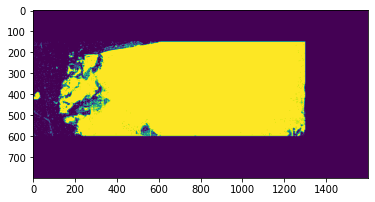

In [36]:
plt.imshow(mask)
plt.show()

In [37]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [38]:
!mkdir ./../data/SIMMIM/spleen_histologyslides_148_HISTO_20X

In [41]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/spleen_histologyslides_148_HISTO_20X/spleen_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 21/21 [00:16<00:00,  1.29it/s]


# spleen 3

(26723, 53350, 3)


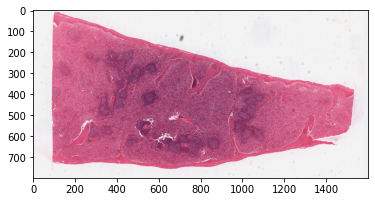

In [45]:
im = tifffile.imread('./../data_downloads/spleen_histologyslides_301_HISTO_40X.zif')
print(im.shape)
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
im_small = cv.resize(im, (1600, 800))
plt.imshow(im_small)
plt.show()

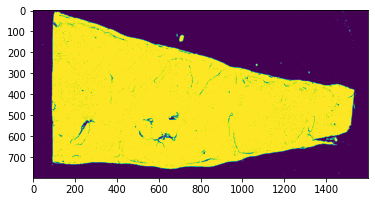

In [48]:
mask = (im_small.mean(axis=2) < 220).astype(np.uint8)
# mask[:, 1300:] = 0
# mask[:150] = 0
# mask[600:] = 0
plt.imshow(mask)
plt.show()

In [49]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [50]:
!mkdir ./../data/SIMMIM/spleen_histologyslides_301_HISTO

In [51]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/spleen_histologyslides_301_HISTO/spleen_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 17/17 [00:17<00:00,  1.06s/it]


# prostate

In [138]:
im = tifffile.imread('./../data_downloads/prostate_histologyslides_281_HISTO_40X.zif')

In [139]:
im.shape

(77397, 131920, 3)

In [140]:
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

In [144]:
im_small = cv.resize(im, (1300, 700))

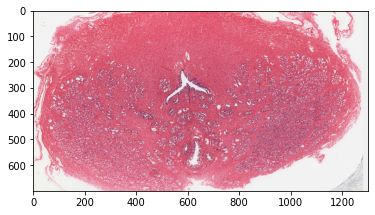

In [145]:
plt.imshow(im_small)
plt.show()

In [156]:
mask = ((im_small.mean(axis=2) < 240).astype(np.uint8))
mask[:300] = 0
mask[-100:, -200:] = 0
mask[:, -150:] = 0

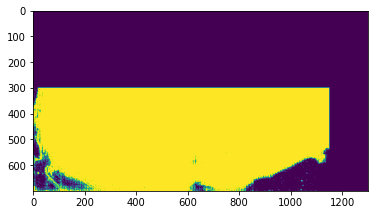

In [157]:
plt.imshow(mask)

In [158]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [159]:
!mkdir ./../data/SIMMIM/prostate_histologyslides_281_HISTO

In [160]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/prostate_histologyslides_281_HISTO/prostate_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 50/50 [01:46<00:00,  2.12s/it]


# prostate PESO dataset

In [8]:
non_cancer = ['pds_13_HE.tif', 'pds_15_HE.tif', 'pds_16_HE.tif',
              'pds_17_HE.tif', 'pds_18_HE.tif', 'pds_1_HE.tif', 'pds_5_HE.tif', 'pds_9_HE.tif']

In [4]:
!mkdir ./../data/SIMMIM/prostate_PESO

mkdir: cannot create directory ‘./../data/SIMMIM/prostate_PESO’: File exists


pds_18_HE.tif
(105289, 47484, 3)


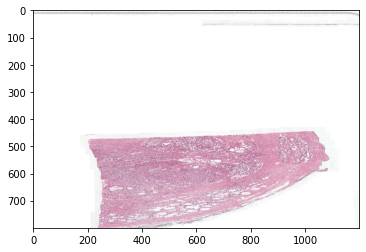

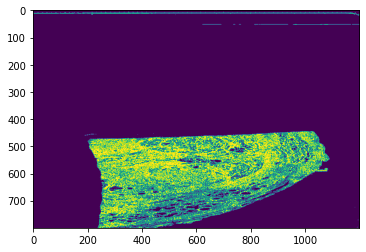

100%|██████████| 82/82 [00:45<00:00,  1.80it/s]


pds_1_HE.tif
(105289, 47484, 3)


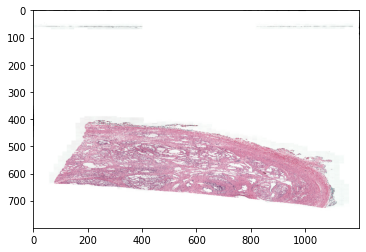

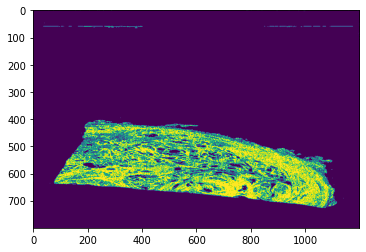

100%|██████████| 82/82 [00:39<00:00,  2.07it/s]


pds_5_HE.tif
(105289, 47484, 3)


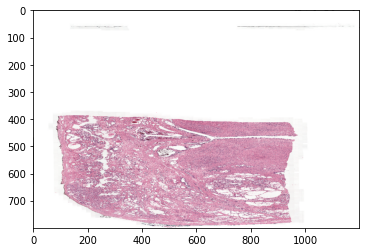

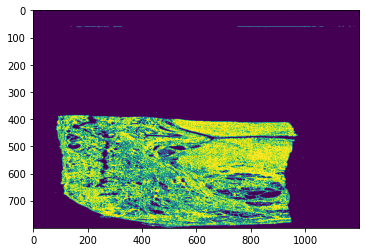

100%|██████████| 82/82 [00:57<00:00,  1.42it/s]


pds_9_HE.tif
(105289, 47484, 3)


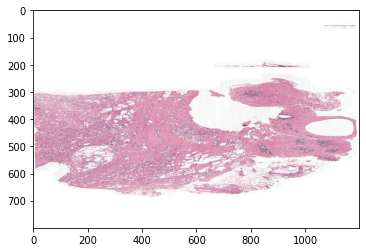

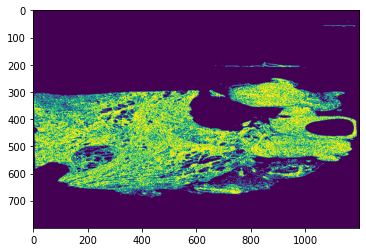

100%|██████████| 82/82 [01:08<00:00,  1.20it/s]


In [9]:
for bname in non_cancer:
    print(bname)
    full_img_name = './../data/SIMMIM_raw/' + bname
#     img = tifffile.imread(full_img_name)
    
    im = np.squeeze(tifffile.imread(full_img_name))
    print(im.shape)
    
    if (im.shape[0] == 3):
        im = im.transpose((1, 2, 0))
    
    im = cv.resize(im, None, fx=0.5 * (0.48 / 0.4), fy=0.5 * (0.48 / 0.4), interpolation=cv.INTER_AREA)
    im_small = cv.resize(im, (1200, 800))
    plt.imshow(im_small)
    plt.show()
    mask = ((im_small.mean(axis=2) > 1) & (im_small.mean(axis=2) < 200)).astype(np.uint8)
    plt.imshow(mask)
    plt.show()
    
    mask = cv.resize(mask, (im.shape[1], im.shape[0]))
    
    for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
        for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
            mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
            if mask_slc.mean() > 0.05:
                patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
    #             plt.imshow(patch)
    #             plt.show()
    #             0/0
                cv.imwrite(
                    './../data/SIMMIM/prostate_PESO/prostate_{}_patch_dy_{}_dx_{}.png'.format(bname, dy, dx),
                    patch[:, :, ::-1]
                )

# lung 1

In [162]:
im = tifffile.imread('./../data_downloads/lung_histologyslides_130-1_HISTO_40X.zif')

In [163]:
im.shape

(74179, 117370, 3)

In [164]:
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

In [165]:
im_small = cv.resize(im, (1120, 700))

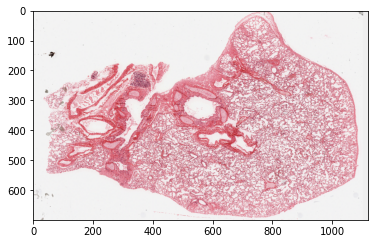

In [166]:
plt.imshow(im_small)
plt.show()

In [177]:
mask = ((im_small.mean(axis=2) < 240).astype(np.uint8))
mask[:, :300] = 0
mask[:300, :500] = 0
mask[:400, 500:700] = 0
# mask[-100:, -200:] = 0
# mask[:, -150:] = 0

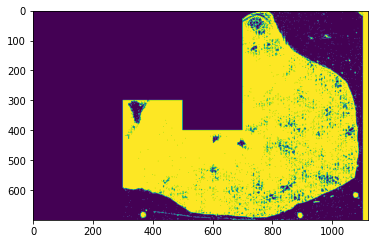

In [178]:
plt.imshow(mask)

In [179]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [180]:
!mkdir ./../data/SIMMIM/lung_histologyslides_130-1_HISTO

In [181]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/lung_histologyslides_130-1_HISTO/lung_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 48/48 [01:14<00:00,  1.55s/it]


# lung 2

(44133, 40740, 3)


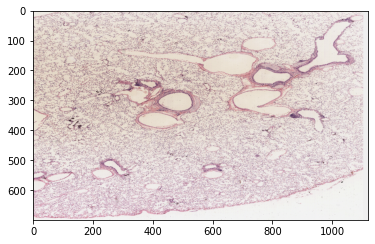

In [54]:
im = tifffile.imread('./../data_downloads/lung_histologyslides_132_HISTO_40X.zif')
print(im.shape)
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
im_small = cv.resize(im, (1120, 700))
plt.imshow(im_small)
plt.show()

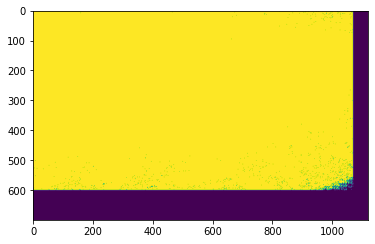

In [56]:
mask = ((im_small.mean(axis=2) < 240).astype(np.uint8))
mask[-100:] = 0
mask[:, -50:] = 0
plt.imshow(mask)
plt.show()

In [57]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [58]:
!mkdir ./../data/SIMMIM/lung_histologyslides_132_HISTO

In [59]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/lung_histologyslides_132_HISTO/lung_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 28/28 [00:29<00:00,  1.04s/it]


# lung 3

(50124, 160050, 3)


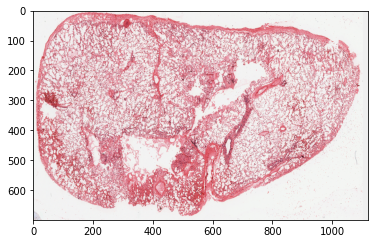

In [13]:
im = tifffile.imread('./../data_downloads/lung_histologyslides_130-2_HISTO_40X.zif')
print(im.shape)
im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
im_small = cv.resize(im, (1120, 700))
plt.imshow(im_small)
plt.show()

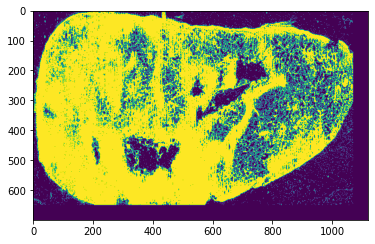

In [16]:
mask = ((im_small.mean(axis=2) < 240).astype(np.uint8))
mask[-50:] = 0
mask[:, -50:] = 0
plt.imshow(mask)
plt.show()

In [17]:
mask = cv.resize(mask, (im.shape[1], im.shape[0]))

In [18]:
!mkdir ./../data/SIMMIM/lung_histologyslides_130-2_HISTO_40X

In [19]:
for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
    for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
        mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
        if mask_slc.mean() > 0.1:
            patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
#             plt.imshow(patch)
#             plt.show()
#             0/0
            cv.imwrite(
                './../data/SIMMIM/lung_histologyslides_130-2_HISTO_40X/lung_patch_dy_{}_dx_{}.png'.format(dy, dx),
                patch[:, :, ::-1]
            )

100%|██████████| 32/32 [01:54<00:00,  3.59s/it]


# kidney

In [202]:
!mkdir ./../data/SIMMIM/kidney_kaggle_2021

In [205]:
# !rm ./../data/SIMMIM/kidney_kaggle_2021/*.png

In [61]:
glob('./../other_data/kidney_HUBMAP_2021/train/*.tiff')

['./../other_data/kidney_HUBMAP_2021/train/2f6ecfcdf.tiff',
 './../other_data/kidney_HUBMAP_2021/train/0486052bb.tiff',
 './../other_data/kidney_HUBMAP_2021/train/1e2425f28.tiff',
 './../other_data/kidney_HUBMAP_2021/train/b2dc8411c.tiff',
 './../other_data/kidney_HUBMAP_2021/train/b9a3865fc.tiff',
 './../other_data/kidney_HUBMAP_2021/train/26dc41664.tiff',
 './../other_data/kidney_HUBMAP_2021/train/aaa6a05cc.tiff',
 './../other_data/kidney_HUBMAP_2021/train/cb2d976f4.tiff',
 './../other_data/kidney_HUBMAP_2021/train/afa5e8098.tiff',
 './../other_data/kidney_HUBMAP_2021/train/54f2eec69.tiff',
 './../other_data/kidney_HUBMAP_2021/train/095bf7a1f.tiff',
 './../other_data/kidney_HUBMAP_2021/train/c68fe75ea.tiff',
 './../other_data/kidney_HUBMAP_2021/train/e79de561c.tiff',
 './../other_data/kidney_HUBMAP_2021/train/8242609fa.tiff',
 './../other_data/kidney_HUBMAP_2021/train/4ef6695ce.tiff']

./../other_data/kidney_HUBMAP_2021/train/095bf7a1f.tiff
(3, 38160, 39000)


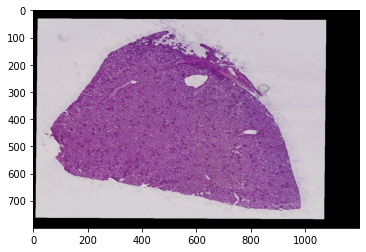

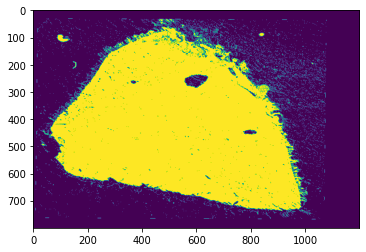

100%|██████████| 24/24 [00:17<00:00,  1.34it/s]


./../other_data/kidney_HUBMAP_2021/train/c68fe75ea.tiff
(3, 26840, 49780)


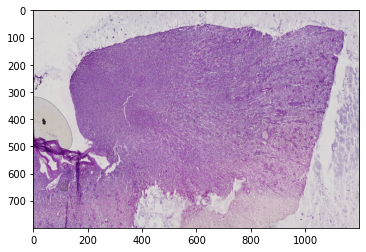

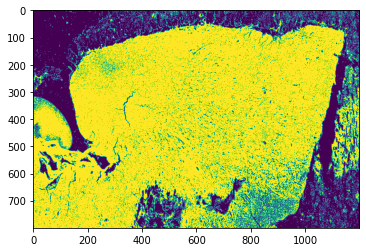

100%|██████████| 17/17 [00:26<00:00,  1.57s/it]


./../other_data/kidney_HUBMAP_2021/train/e79de561c.tiff
(3, 16180, 27020)


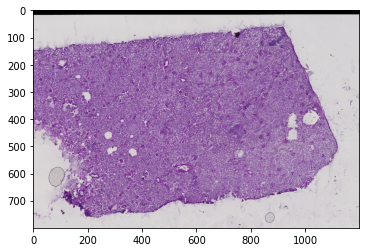

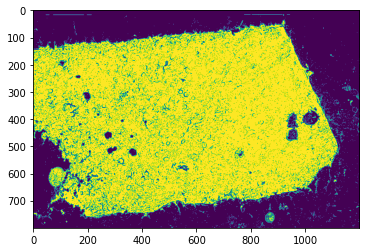

100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


./../other_data/kidney_HUBMAP_2021/train/8242609fa.tiff
(31299, 44066, 3)


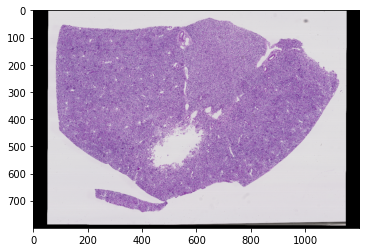

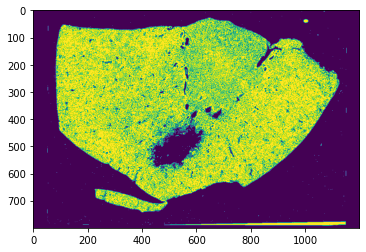

100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


./../other_data/kidney_HUBMAP_2021/train/4ef6695ce.tiff
(3, 39960, 50680)


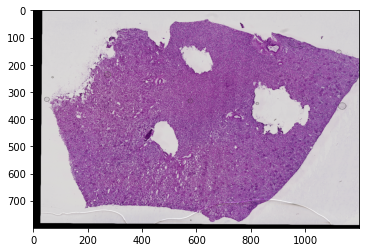

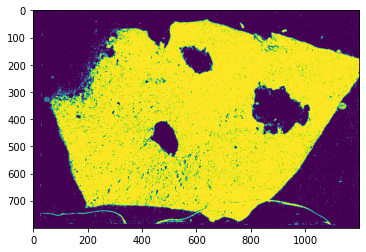

100%|██████████| 26/26 [00:30<00:00,  1.16s/it]


In [4]:
# for fname in glob('./../other_data/kidney_HUBMAP_2021/train/*.tiff'):
for fname in ['./../other_data/kidney_HUBMAP_2021/train/095bf7a1f.tiff',
 './../other_data/kidney_HUBMAP_2021/train/c68fe75ea.tiff',
 './../other_data/kidney_HUBMAP_2021/train/e79de561c.tiff',
 './../other_data/kidney_HUBMAP_2021/train/8242609fa.tiff',
 './../other_data/kidney_HUBMAP_2021/train/4ef6695ce.tiff']:
    print(fname)
    bname = os.path.basename(fname).split('.')[0]
    im = np.squeeze(tifffile.imread(fname))
    print(im.shape)
    
    if (im.shape[0] == 3):
        im = im.transpose((1, 2, 0))
    
    im = cv.resize(im, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    im_small = cv.resize(im, (1200, 800))
    plt.imshow(im_small)
    plt.show()
    mask = ((im_small.mean(axis=2) > 1) & (im_small.mean(axis=2) < 200)).astype(np.uint8)
    plt.imshow(mask)
    plt.show()
    
    mask = cv.resize(mask, (im.shape[1], im.shape[0]))
    
    for dy in tqdm(range(0, im.shape[0] - PATCH_SIZE, PATCH_SIZE)):
        for dx in range(0, im.shape[1] - PATCH_SIZE, PATCH_SIZE):
            mask_slc = mask[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
            if mask_slc.mean() > 0.05:
                patch = im[dy:dy + PATCH_SIZE, dx:dx + PATCH_SIZE]
    #             plt.imshow(patch)
    #             plt.show()
    #             0/0
                cv.imwrite(
                    './../data/SIMMIM/kidney_kaggle_2021/kidney_{}_patch_dy_{}_dx_{}.png'.format(bname, dy, dx),
                    patch[:, :, ::-1]
                )

In [210]:
# for fname in glob('./../data/SIMMIM/kidney_kaggle_2021/*.png'):
#     if 'afa5e8098' in fname: # fucked up
#         os.remove(fname)

# total

In [29]:
for pth in glob('./../data/SIMMIM/*'):
    count = len(glob(os.path.join(pth, '*.png')))
    print(pth, ':', count)

./../data/SIMMIM/kaggle_hpa : 3094
./../data/SIMMIM/lung_histologyslides_130-1_HISTO : 1648
./../data/SIMMIM/prostate_histologyslides_281_HISTO : 2065
./../data/SIMMIM/prostate_PESO : 7588
./../data/SIMMIM/spleen_histologyslides_148_HISTO_20X : 340
./../data/SIMMIM/largeintestine_Kather : 160
./../data/SIMMIM/largeintestine_histologyslides_176_HISTO : 352
./../data/SIMMIM/largeintestine_histologyslides_177_HISTO : 133
./../data/SIMMIM/glas_largeintestine : 330
./../data/SIMMIM/spleen_histologyslides_301_HISTO : 365
./../data/SIMMIM/spleen_histologyslides_147B_HISTO : 227
./../data/SIMMIM/kidney_kaggle_2021 : 3758
./../data/SIMMIM/lung_histologyslides_130-2_HISTO_40X : 2540
./../data/SIMMIM/lung_histologyslides_132_HISTO : 649


In [30]:
for organ in {'kidney', 'largeintestine', 'lung', 'prostate', 'spleen'}:
    count = len(glob('./../data/SIMMIM/*/{}_*.png'.format(organ)))
    print('{:15} : {}'.format(organ, count))

lung            : 5264
spleen          : 1399
kidney          : 4629
prostate        : 10460
largeintestine  : 1497


In [31]:
len(glob('./../data/SIMMIM/*/*_*.png'))

23249